In [2]:
# Description: This program classifies images 


In [4]:
#libraries 
import tensorflow as tf 
from tensorflow import keras 
from keras.models import Sequential 
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras import layers 
from keras.utils import to_categorical 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [5]:
#Load the data
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [6]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
#Get the shape of the arrays 
print('x_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('x_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


In [8]:
#Get the index of the image 
index = 10
X_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

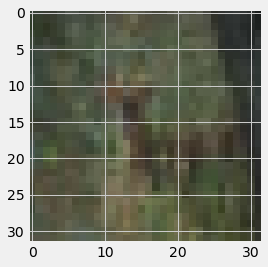

In [9]:
#Show the image as a picture 
img =plt.imshow(X_train[index])

In [10]:
#Get the image label 
print('The image label is : ',y_train[index])

The image label is :  [4]


In [11]:
#Get the image classification
classification = ['airplane','automobile','bird','deer','dog','frog','horse','Ship','truck']
#Print the image class 
print('The image class is: ',classification[y_train[index][0]])

The image class is:  dog


In [12]:
#Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [13]:
#print the new labels 
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [14]:
#print the new label of the image/picture above 
print('The one hot label is : ',y_train_one_hot[index])

The one hot label is :  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [15]:
#Normalize the pixels between 0 and 1 
X_train = X_train/255
X_test = X_test/255

In [16]:
X_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [17]:
#Creating a model 
model = Sequential()
#Add first layer 
model.add(Conv2D(32,(5,5),activation = 'relu',input_shape=(32,32,3)))
#Add a pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))
#Add another convolution layer 
model.add(Conv2D(32,(5,5),activation='relu'))
#Add another pooling layer 
model.add(MaxPooling2D(pool_size = (2,2)))
#Add a Flattening layer
model.add(Flatten())


#Add a layer with 1000 neurons 
model.add(Dense(1000,activation = 'relu'))
#Add a drop out layer 
model.add(Dropout(0.5))
#Add a layer with 500 neurons 
model.add(Dense(500,activation = 'relu'))
model.add(Dropout(0.5))
#Add a layer with 250 neurons 
model.add(Dense(250,activation = 'relu'))
#Add a layer with 10 neurons 
model.add(Dense(10,activation = 'softmax'))

In [19]:
#Compile the model 
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [20]:
hist = model.fit(X_train,y_train_one_hot,
                batch_size = 256,
                epochs = 10,
                validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 48s 300ms/step - loss: 1.7931 - accuracy: 0.3287 - val_loss: 1.4737 - val_accuracy: 0.4516
Epoch 2/10
157/157 [==============================] - 46s 295ms/step - loss: 1.4053 - accuracy: 0.4865 - val_loss: 1.3396 - val_accuracy: 0.5288
Epoch 3/10
157/157 [==============================] - 47s 298ms/step - loss: 1.2537 - accuracy: 0.5483 - val_loss: 1.2012 - val_accuracy: 0.5704
Epoch 4/10
157/157 [==============================] - 47s 302ms/step - loss: 1.1481 - accuracy: 0.5917 - val_loss: 1.1104 - val_accuracy: 0.6092
Epoch 5/10
157/157 [==============================] - 46s 296ms/step - loss: 1.0582 - accuracy: 0.6237 - val_loss: 1.1197 - val_accuracy: 0.6058
Epoch 6/10
157/157 [==============================] - 48s 305ms/step - loss: 0.9970 - accuracy: 0.6470 - val_loss: 1.0676 - val_accuracy: 0.6287
Epoch 7/10
157/157 [==============================] - 48s 303ms/step - loss: 0.9204 - accuracy: 0.6737 - val_loss: 0.9741 - val_ac

In [21]:
#Evaluate the model using th test data
model.evaluate(X_test,y_test_one_hot)[1]

313/313 [==============================] - 4s 14ms/step - loss: 0.9465 - accuracy: 0.6741


0.6740999817848206

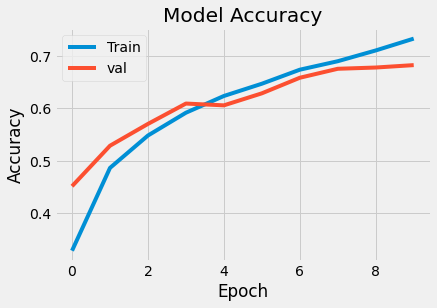

In [23]:
#Visualization of the model accuracy 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','val'],loc ='upper left')
plt.show()

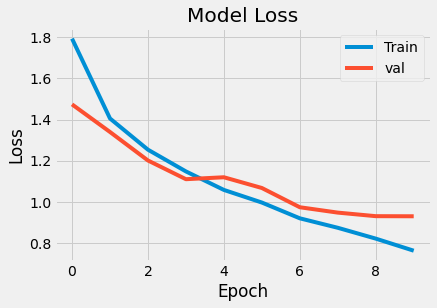

In [24]:
#Visualization of models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','val'],loc ='upper right')
plt.show()

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
pip install google.colab